In [4]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [5]:
def tt_q(file, wl, rows, diag = False): # Converts 2 theta to Q, wl in Angstroms and rows is the number of rows to skip

    data = np.loadtxt(file, skiprows=rows, delimiter = ',')
    tt = data[:,0]
    q = 4. * np.pi / wl * np.sin((tt * np.pi/180.)/2.) # Convert to q
    final = np.zeros((len(data[:,0]), 2))
    
    if diag != False:
        plt.figure(1)
        plt.subplot(211)
        plt.errorbar(tt, np.log10(data[:,1]), yerr = 0.434 * (np.sqrt(data[:,1]) / data[:,1]),
        capsize = 1., markersize = 2., marker='.', linestyle = 'None', color = 'blue')
        plt.title(r'$2 \theta$ vs. intensity')
        plt.xlabel(r'$2 \theta$ $[^{\circ}]$')
        plt.ylabel('Counts')
        plt1 = plt.subplot(212)
        plt1.errorbar(q, np.log10(data[:,1]), yerr = 0.434 * (np.sqrt(data[:,1]) / data[:,1]), capsize = 1., markersize = 2., marker='.', linestyle = 'None', color = 'blue')
        #plt1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(7))
        plt.title('Q vs. intensity')
        plt.xlabel('$Q_z$ $[\AA^{-1}]$')
        plt.ylabel('Counts')
        plt.show()

    final[:,0] = q
    final[:,1] = data[:,2]
    
    # Renaming stuff
    name = file[:-4] + '_Q.dat'

    print('Converted from 2 theta to Q. Wl = {} A.'.format(wl))
    np.savetxt(name, final, fmt = '%.8e') # save to file

    return None

def q_tt(file, wl, sepa, rows): # Converts q to 2 theta

    data = pd.read_csv(file, header=None, delimiter=None, skiprows=rows, sep=sepa).values
    q = data[:,0]
    tt = 2. * np.arcsin(wl * q / (4. * np.pi)) # convert to tt
    final = pd.DataFrame(data = np.column_stack((data[:,1], data[:,2])), index = tt) # Create dataframe
    
    plt.figure(1)
    plt.subplot(212)
    plt.plot(tt, np.log10(data[:,1]), '.')
    plt.title(r'$2 \theta$ vs. intensity')
    plt.xlabel(r'$2 \theta$ $[^{\circ}]$')
    plt.ylabel('Reflectivity')
    plt1 = plt.subplot(211)
    plt1.plot(q, np.log10(data[:,1]), '.')
    #plt1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(7))
    plt.title('Q vs. intensity')
    plt.xlabel('$q_z$ $[\AA^{-1}]$')
    plt.ylabel('Reflectivity')
    plt.show()

    # Renaming stuff
    i = 1
    while file[i] != '.':
        i = i + 1

    name = file[:i] + '_tt.dat'

    print('Converted from Q to 2 theta. Wl = {} A.'.format(wl))
    final.to_csv(name, header=None, columns=None, sep=' ') # save to file

    return None

def footprint(file, h_sample, h_beam, pts, rows): # file - input file path, h_sample - height of the sample, h_beam - height of the beam

    #data = np.loadtxt(file, delimiter =', ', skiprows = rows )
    date = np.genfromtxt(file, delimiter=',', skip_header= rows)
    # Calculate overillumination angle
    theta_ill = np.arcsin(h_beam / h_sample) * 180 / np.pi

    # Change intensity
    i = 0
    while data[i,0]/2. < theta_ill:
        data[i,1] = data[i,1] * (h_beam / (h_sample * np.sin(data[i,0]/2. * np.pi/180.)))
        i = i + 1

    name = file[:-4] + '_foot.dat'
    
    final = np.savetxt(name, data[pts:,:], fmt = '%.8e')
    
    return None
    
def normalize(file): # This routine divides with max(file)
    data = np.loadtxt(file)
    abs_error = np.sqrt(data[:,1])  
    rel_error = abs_error / data[:,1]
    
    data[:,1] = data[:,1] / max(data[:,1])
    rel_error[np.isnan(rel_error)] = 1.
    norm_error = rel_error * data[:,1]
    indices = np.nonzero(norm_error != 0)[0]
    norm_error = norm_error[indices]    
    
    # Renaming stuff
    name = file[:-4] + '_error.dat'
    
    final = np.zeros((len(indices), 3))
    final[:,0] = data[indices,0] # q
    final[:,1] = data[indices,1] # Intensity
    final[:,2] = norm_error # Error

    name = file[:-4] + '_error.dat'

    np.savetxt(name, final, delimiter = '\t', header = 'q\t\t\t\t\trefl\t\t\t\trefl_err', fmt = '%.10e', comments='')
    
    return final

def ATTcorrect(file, rlow,rhigh, fac):
    
    data=np.loadtxt(file, skiprows=1)
    
    plt.plot(data[:,0],data[:,1],label= 'uncorrected')  
    
    I = data[:,1]   
    I[rlow:rhigh] = I[rlow:rhigh]*fac
    
    final = np.zeros((len(I),3))
    
    final[:,0]=data[:,0]
    final[:,1]= I[:]
    final[:,2]=data[:,2]
    
    plt.plot(final[:,0],final[:,1], label='corrected')
    
    plt.yscale('log')
    plt.xlim(0.0,0.1)
    plt.ylim(0.1,1.1)
    
    name = file[:-4] + '_att_corrected.dat'
    
    np.savetxt(name, final, delimiter = '\t', header = 'q\t\t\t\t\trefl\t\t\t\trefl_err',
               fmt = '%.10e', comments='#atten fac ='+str(fac)+' for data points '+str(rlow)+' to '+str(rhigh)+'')

    return None
    
    
    

In [3]:
tt_q('IAE18_XRR_1.csv', 1.5405, 37, False) # Converts from 2 theta to q
normalize('IAE18_XRR_1_Q.dat') # Divides with max(R) to have R = 1 

Converted from 2 theta to Q. Wl = 1.5405 A.


array([[5.33896121e-03, 7.01958279e-02, 8.24180860e-05],
       [6.05082258e-03, 8.13913560e-02, 8.87474773e-05],
       [6.76268391e-03, 9.30181811e-02, 9.48747831e-05],
       ...,
       [5.67251413e-01, 7.74147537e-07, 2.73702486e-07],
       [5.67961550e-01, 5.80610652e-07, 2.37033306e-07],
       [5.68671681e-01, 3.87073768e-07, 1.93536884e-07]])

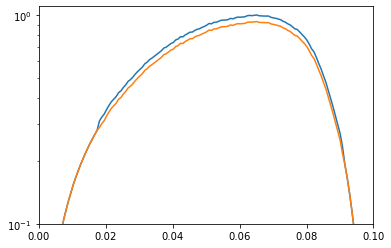

In [41]:
def ATTcorrect(file, rlow,rhigh, fac):
    
    data=np.loadtxt(file, skiprows=1)
    
    plt.plot(data[:,0],data[:,1],label= 'uncorrected')  
    
    I = data[:,1]   
    I[rlow:rhigh] = I[rlow:rhigh]*fac
    
    final = np.zeros((len(I),3))
    
    final[:,0]=data[:,0]
    final[:,1]= I[:]
    final[:,2]=data[:,2]
    
    plt.plot(final[:,0],final[:,1], label='corrected')
    
    plt.yscale('log')
    plt.xlim(0.0,0.1)
    plt.ylim(0.1,1.1)
    
    name = file[:-4] + '_att_corrected.dat'
    
    np.savetxt(name, final, delimiter = '\t', header = 'q\t\t\t\t\trefl\t\t\t\trefl_err',
               fmt = '%.10e', comments='#atten fac ='+str(fac)+' for data points '+str(rlow)+' to '+str(rhigh)+'')

    return None

ATTcorrect('IAE18_XRR_1_Q_error.dat',18,121,0.93)